### Diabetes predict using KNN Classification
Ahmad Sotoude <br>
<a href="https://github.com/ahmadeshanam">link to github</a>

importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

importing data:

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


data shape and features:

In [3]:
print('rows: ',df.shape[0])
print('cols: ',df.shape[1])
print('columns: ',df.columns.values)

rows:  767
cols:  9
columns:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


checking for null values:

In [4]:
df.info()
print('\n\nNull Values:')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null Values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

understanding data:

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


as shown above, values have the minimum of 0 which is impossible<br>
for some of them like BMI. We consider them as NULL values.

In [6]:
df.loc[(df['BMI'] == 0) , 'BMI'] = np.nan
df.loc[(df['Glucose'] == 0) , 'Glucose'] = np.nan
df.loc[(df['BloodPressure'] == 0) , 'BloodPressure'] = np.nan
df.loc[(df['SkinThickness'] == 0) , 'SkinThickness'] = np.nan
df.loc[(df['Insulin'] == 0) , 'Insulin'] = np.nan

df.info()
print('\n\nNull Values:')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             732 non-null    float64
 3   SkinThickness             540 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       756 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Null Values:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

since we dont want to lose data, <br>
we calculate mean for each age and <br>
replace the null values with them:

In [7]:
df['AgeGroup'] = (df['Age'] // 10) * 10

In [8]:
mean_bmi_by_age = df.groupby('AgeGroup')['BMI'].mean().reset_index()
print('mean BMI in AgeGroup:\n',mean_bmi_by_age.head(3))

mean_skin_by_age = df.groupby('AgeGroup')['SkinThickness'].mean().reset_index()
print('\nmean SkinThickness in AgeGroup:\n',mean_skin_by_age.head(3))

mean_Glucose_by_age = df.groupby('AgeGroup')['Glucose'].mean().reset_index()
print('\nmean Glucose in AgeGroup:\n',mean_Glucose_by_age.head(3))

mean_BP_by_age = df.groupby('AgeGroup')['BloodPressure'].mean().reset_index()
print('\nmean BloodPressure in AgeGroup:\n',mean_BP_by_age.head(3))

mean_Insulin_by_age = df.groupby('AgeGroup')['Insulin'].mean().reset_index()
print('\nmean Insulin in AgeGroup:\n',mean_Insulin_by_age.head(3))


mean BMI in AgeGroup:
    AgeGroup        BMI
0        20  32.041860
1        30  32.670122
2        40  34.617797

mean SkinThickness in AgeGroup:
    AgeGroup  SkinThickness
0        20      27.759615
1        30      30.620370
2        40      31.706667

mean Glucose in AgeGroup:
    AgeGroup     Glucose
0        20  114.668367
1        30  126.073171
2        40  125.709402

mean BloodPressure in AgeGroup:
    AgeGroup  BloodPressure
0        20      68.821333
1        30      73.685897
2        40      77.212389

mean Insulin in AgeGroup:
    AgeGroup     Insulin
0        20  139.250000
1        30  164.602564
2        40  163.913043


In [9]:
print(mean_skin_by_age,'\n')
print(mean_Insulin_by_age)

   AgeGroup  SkinThickness
0        20      27.759615
1        30      30.620370
2        40      31.706667
3        50      30.125000
4        60      34.545455
5        70      18.000000
6        80      33.000000 

   AgeGroup     Insulin
0        20  139.250000
1        30  164.602564
2        40  163.913043
3        50  249.440000
4        60  297.750000
5        70         NaN
6        80   60.000000


still there are some inaccuracies in the tables above

In [10]:
mean_Insulin_by_age.loc[mean_Insulin_by_age['AgeGroup']>60,'Insulin'] = mean_Insulin_by_age['Insulin'].mean()
mean_skin_by_age.loc[mean_skin_by_age['AgeGroup']>60,'SkinThickness'] = mean_skin_by_age['SkinThickness'].mean()

now we replace NaNs with proper values

In [11]:
df['BMI'] = df.apply(lambda row: mean_bmi_by_age.loc[mean_bmi_by_age['AgeGroup'] == row['AgeGroup'], 'BMI'].values[0] if pd.isna(row['BMI']) else row['BMI'], axis=1)

df['SkinThickness'] = df.apply(lambda row: mean_skin_by_age.loc[mean_skin_by_age['AgeGroup'] == row['AgeGroup'], 'SkinThickness'].values[0] if pd.isna(row['SkinThickness']) else row['SkinThickness'], axis=1)

df['Insulin'] = df.apply(lambda row: mean_Insulin_by_age.loc[mean_Insulin_by_age['AgeGroup'] == row['AgeGroup'], 'Insulin'].values[0] if pd.isna(row['Insulin']) else row['Insulin'], axis=1)

df['Glucose'] = df.apply(lambda row: mean_Glucose_by_age.loc[mean_Glucose_by_age['AgeGroup'] == row['AgeGroup'], 'Glucose'].values[0] if pd.isna(row['Glucose']) else row['Glucose'], axis=1)

df['BloodPressure'] = df.apply(lambda row: mean_BP_by_age.loc[mean_BP_by_age['AgeGroup'] == row['AgeGroup'], 'BloodPressure'].values[0] if pd.isna(row['BloodPressure']) else row['BloodPressure'], axis=1)

print('\n\nNull Values:')
df.isna().sum()



Null Values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup                    0
dtype: int64

Data is cleaned, now we try to understand it

In [12]:
print('Ys situation (Diabetes: T/F)\n',df['Outcome'].value_counts())

Ys situation (Diabetes: T/F)
 Outcome
0    499
1    268
Name: count, dtype: int64


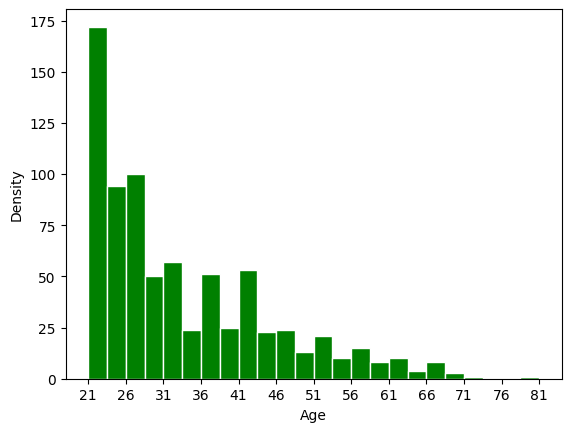

In [13]:
bins_num = int((86-21)/5)
plt.hist(df['Age'],bins=24,ec='white',color='green')
plt.xticks(np.arange(21,86,5))
plt.ylabel('Density')
plt.xlabel('Age')
plt.show()

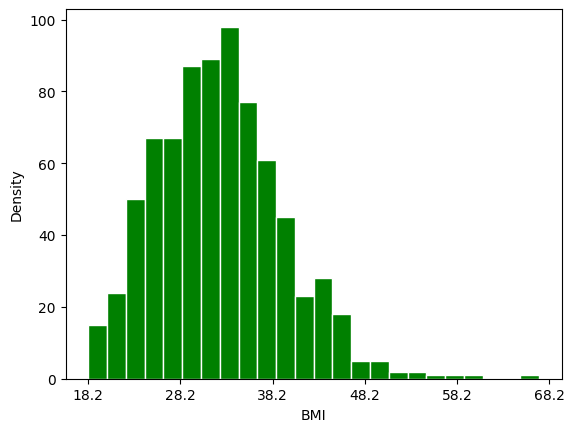

In [14]:
plt.hist(df['BMI'],ec='white',color='green', bins=24)
plt.xticks(np.arange(df['BMI'].min(),df['BMI'].max()+10,10))
plt.ylabel('Density')
plt.xlabel('BMI')
plt.show()

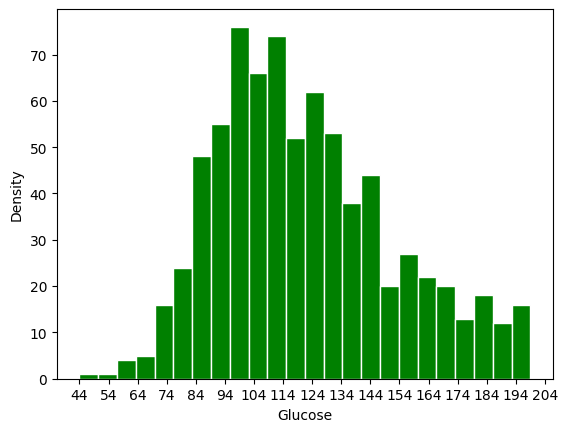

In [15]:
plt.hist(df['Glucose'],ec='white',color='green', bins=24)
plt.xticks(np.arange(df['Glucose'].min(),df['Glucose'].max()+10,10))
plt.ylabel('Density')
plt.xlabel('Glucose')
plt.show()

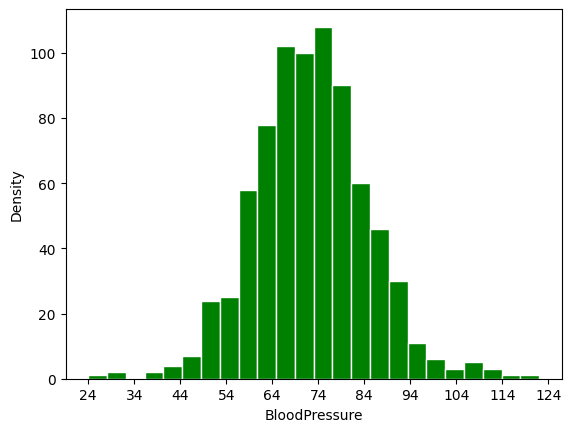

In [16]:
plt.hist(df['BloodPressure'],ec='white',color='green', bins=24)
plt.xticks(np.arange(df['BloodPressure'].min(),df['BloodPressure'].max()+10,10))
plt.ylabel('Density')
plt.xlabel('BloodPressure')
plt.show()

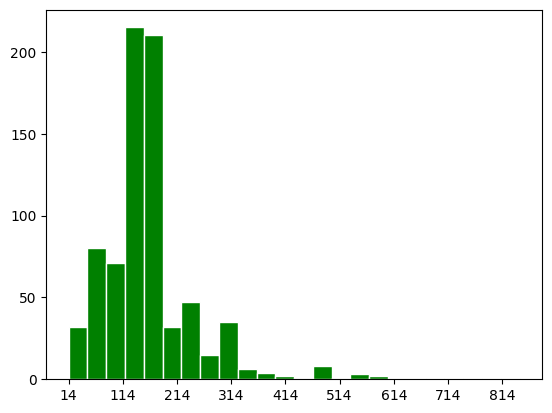

In [17]:
plt.hist(df['Insulin'],ec='white',color='green', bins=24)
plt.xticks(np.arange(df['Insulin'].min(),df['Insulin'].max(),100))
plt.show()

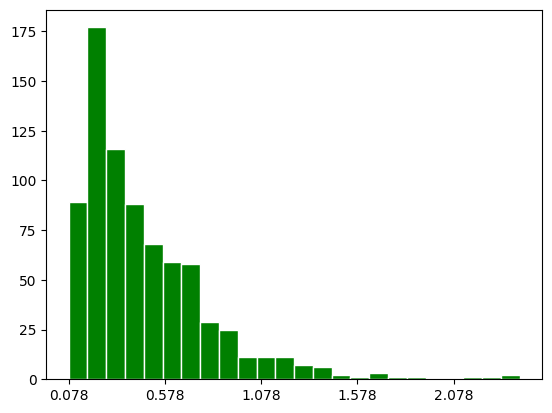

In [18]:
plt.hist(df['DiabetesPedigreeFunction'],ec='white',color='green', bins=24)
plt.xticks(np.arange(df['DiabetesPedigreeFunction'].min(),df['DiabetesPedigreeFunction'].max(),0.5))
plt.show()

normalizing data

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup'],
      dtype='object')

In [20]:
x_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y_data = df[['Outcome']].values
x_data[:5]

array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        2.49440000e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        1.64602564e+02, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 3.06203704e+01,
        1.64602564e+02, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01],
       [0.00000000e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01]])

In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data.astype(float))

x_data[:5]

array([[ 0.63872696,  0.86424691, -0.0308324 ,  0.6301896 ,  0.95370915,
         0.16699439,  0.467638  ,  1.42463671],
       [-0.84582934, -1.20660676, -0.52580863, -0.04632602,  0.02112676,
        -0.85109636, -0.36549383, -0.19177802],
       [ 1.23254948,  2.01472117, -0.69080071,  0.13637496,  0.02112676,
        -1.33105343,  0.60347471, -0.10670356],
       [-0.84582934, -1.07512399, -0.52580863, -0.72284163, -0.75497764,
        -0.63293405, -0.92091504, -1.04252262],
       [-1.14274059,  0.50266928, -2.67070563,  0.6301896 ,  0.05847335,
         1.54868898,  5.4815219 , -0.0216291 ]])

splitting train and test data:

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.8,random_state=1)
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
print('test data size: ', len(x_test))
print('train data size: ', len(x_train))

test data size:  154
train data size:  613


training the model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
knn_model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

predicting y_hat, evaluating model

In [24]:
y_hat = knn_model.predict(x_test)

print('predict: ',y_hat[0:20])
print('actual:  ',y_test[0:20])

predict:  [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
actual:   [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0]


In [25]:
from sklearn import metrics
print('accuracy score: %.4f' % metrics.accuracy_score(y_test,y_hat))

accuracy score: 0.7338


now we loop over different Ks to achieve most accuracy

In [26]:
acc = np.zeros(9)
for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    y_hat = knn_model.predict(x_test)
    acc[k-1] = metrics.accuracy_score(y_test,y_hat)
    print('accuracy for k=%i is %f' %(k,acc[k-1]))

accuracy for k=1 is 0.616883
accuracy for k=2 is 0.707792
accuracy for k=3 is 0.740260
accuracy for k=4 is 0.766234
accuracy for k=5 is 0.766234
accuracy for k=6 is 0.733766
accuracy for k=7 is 0.759740
accuracy for k=8 is 0.753247
accuracy for k=9 is 0.759740


In [27]:
print('best accuracy(%.4f) was at k=%i' %(acc.max(),acc.argmax()+1))

best accuracy(0.7662) was at k=4
